# Iris data set exploration and analysis 

***
### Module: Fundamentals of Data Analsis
### HDip in Data Analysis at ATU 

### Author: Shane Keenan 
### Date: 18/11/2023

***

Project description (from Lecturer Ian McLoughlin )

• The project is to create a notebook investigating the variables and
data points within the well-known iris flower data set associated
with Ronald A Fisher.

Iris – UCI Machine Learning Repository.
Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris
(visited on 08/17/2023).

• In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.

• Select, demonstrate, and explain the most appropriate summary
statistics to describe each variable.

• Select, demonstrate, and explain the most appropriate plot(s) for
each variable.

• The notebook should follow a cohesive narrative about the data
set.

***

• In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.


In [1]:
# lets start by importing the necessary python packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from PIL import Image


Text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)')

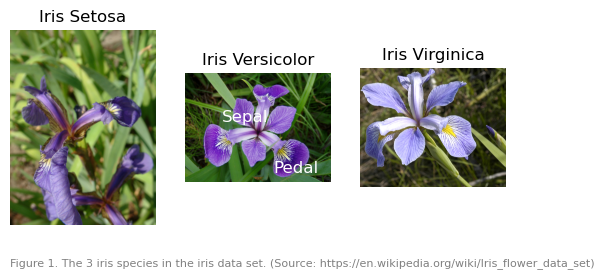

In [10]:
image1 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_setosa.jpg")
image2 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_versicolor.jpg")
image3 = Image.open("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\img\\Iris_virginica.jpg")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)  
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title("Iris Setosa")
ax2.set_title("Iris Versicolor")
ax3.set_title("Iris Virginica")
ax2.text(500, 500, 'Sepal', color='white', fontsize=12, ha='left', va='top', alpha=1)
ax2.text(1200, 1200, 'Pedal', color='white', fontsize=12, ha='left', va='top', alpha=1)
ax1.text(0, 1500, 'Figure 1. The 3 iris species in the iris data set. (Source: https://en.wikipedia.org/wiki/Iris_flower_data_set)', color='black', fontsize=8, ha='left', va='top', alpha=0.5)
#plt.arrow(2,5,4,2,width=.3, edgecolor='green',facecolor='red',linestyle='--',linewidth=3)

Data set description

The Iris data set is a multivariate data set collated by British statistician and biologist Ronald Fisher. It was first published in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. 
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor) giving a total of 150 rows of data.
There are 5 columns of data, 4 columns containing measurements of the various flower characteractics, Sepal Length [cm], Sepal Width [cm], Petal Length [cm] and Petal Width [cm]. The 5th column specifies the species of Iris. The 3 species of Iris are shown in figure 1 along with labels of the pedal and sepal parts of the Iris.
Note: the Sepal is any of the outer parts of a flower that enclose and protect the unopened flower bud and for these Iris are coloured similarly to the pedal.


Import the data as a pandas dataframe 

In [7]:
#read in the csv file from local drive 
''' download iris.csv data file and change this path '''
data = pd.read_csv("C:\\Users\\shane\\Desktop\\HDip in Data Analytics\\Semester 2\\Fundamentals of Data Analysis\\fundamentals_of_data_analysis\\project data\\iris.csv")

In [8]:
#  displays the top 5 rows 
data.head() #

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# tidy up the data - rename the columns with formated titles
newcols={"sepallength":"Sepal Length [cm]","sepalwidth":"Sepal Width [cm]","petallength":"Petal Length [cm]","petalwidth":"Petal Width [cm]","class":"Species"}
# rename columns
data = data.rename(columns=newcols)


,Sepal Length [cm],Sepal Width [cm],Petal Length [cm],Petal Width [cm],Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# what does the data set look like 

data.shape 

(150, 5)

In [28]:
# what are the python data types 

data.dtypes

Sepal Length [cm]    float64
Sepal Width [cm]     float64
Petal Length [cm]    float64
Petal Width [cm]     float64
Species               object
dtype: object

In [26]:
data.describe()

,Sepal Length [cm],Sepal Width [cm],Petal Length [cm],Petal Width [cm]
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#list with column names for plotting axes 
cols = ['Sepal Length [cm]', 'Sepal Width [cm]', 'Petal Length [cm]', 'Petal Width [cm]']

cols[1]

'Sepal Width [cm]'

In [13]:
# check the quality of the data - missing data etc. 

data.isnull().sum()



Sepal Length [cm]    0
Sepal Width [cm]     0
Petal Length [cm]    0
Petal Width [cm]     0
Species              0
dtype: int64

(150, 5)